In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold

from sklearn import decomposition
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('data_dpc.csv')

label = df['positive|P02647|APO']

df = df.drop(['positive|P02647|APO'], axis = 1)

label = list(label)
count = 0
for i in label:
    
    if 'negative' in i:
        label[count] = '0'
    else:
        label[count] = '1'
    
    count+=1
    
headers = list()
for i in range(400):
    headers.append(i+1)
    
df.columns = headers
df['Labels'] = label

In [3]:
target = df['Labels']
df.drop(['Labels'], 1, inplace = True)

In [4]:
kf = KFold(10)

pca = decomposition.PCA(n_components = 2)
pca.fit(df)
df = pca.transform(df)

clf = RandomForestClassifier(n_estimators = 50, oob_score = True, n_jobs = -1, warm_start = True).fit(df, target.ravel())

In [34]:
'''
    K-FOLD CROSS VALIDATION
'''
acc_total = 0

for train_index, test_index in kf.split(df):
    
    X_train = df[train_index]
    Y_train = target[train_index]
    
    X_test = df[test_index]
    Y_test = target[test_index]
    
    #print(Y_train.shape)
    #print(Y_test.shape)
    
    
    model_svm = clf.fit(X_train,Y_train)
    predictions = model_svm.predict(X_test)
    
    acc = 100*accuracy_score(Y_test,predictions)
    
    acc_total = acc_total + acc
    
print('accuracy = {}'.format(np.round(acc_total/10, 2)))

/anaconda3/lib/python3.6/site-packages/pandas/core/series.py:841: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self.loc[key]


ValueError: Expected 2D array, got 1D array instead:
array=[-9.09644831e-03  1.38231078e-02 -7.31619587e-03  9.95413121e-03
 -1.90012921e-02 -1.13804089e-02 -1.09929591e-02  1.05879921e-03
 -2.64849886e-03  4.40787002e-02 -1.97146665e-02 -2.03317367e-02
 -1.39569696e-02 -1.51614696e-02  1.37908338e-03  3.04931663e-02
  5.06368838e-03  4.41908687e-02 -2.27420088e-02 -2.72258241e-02
 -7.53324945e-03  2.15330394e-03 -1.07269818e-02 -2.09965929e-03
 -8.80519487e-03  2.50252280e-02 -1.33980513e-02 -7.54877785e-03
 -1.80427153e-02 -1.04813054e-02 -1.07018640e-02  1.05605731e-02
 -1.29633294e-02 -2.33820593e-03 -1.13089243e-02  5.96483937e-03
 -4.23550187e-03  3.87163572e-02 -4.97178407e-03  9.69201699e-03
 -1.58207938e-02 -1.36674270e-02 -1.22219417e-02  1.32748038e-02
 -2.47044768e-03  1.61563717e-02 -6.44238060e-03  6.82788482e-03
 -1.35086151e-02 -1.53388095e-03 -1.13673732e-02 -9.64246783e-03
 -1.47731258e-02 -8.88269115e-03 -2.40764744e-03 -1.47740599e-02
 -9.57605988e-03  1.59196332e-02 -1.11312224e-02  1.46966632e-02
 -9.95430630e-03  1.71139892e-02 -2.74963747e-03  5.00850342e-02
 -4.21935780e-04  4.50983793e-02 -7.87406415e-03 -1.07329916e-02
 -1.32510848e-02 -1.54813975e-02  2.74343248e-02 -2.01084814e-03
  1.04009658e-02  8.74902215e-03 -1.79225840e-02 -1.51767032e-02
 -7.99472164e-03  2.70181056e-02 -1.85326755e-03  2.31472645e-02
 -5.87810762e-03 -1.82054825e-02 -1.47399632e-02 -9.31331795e-03
 -6.47707982e-03 -1.02094859e-02 -1.99238677e-03 -6.79577235e-03
 -4.55139903e-03 -5.16729755e-03  1.32089965e-02  3.03320773e-03
  6.02915371e-03  1.67796426e-02  4.79263179e-02  1.18438259e-01
 -3.84312379e-03 -1.79448575e-02  2.34223975e-04 -2.72942279e-02
 -7.65192090e-03 -1.73818190e-02  3.68986418e-03 -1.69613939e-02
  4.05282248e-03 -2.17468967e-03 -1.22745882e-03  5.60747180e-03
 -5.77778742e-03 -1.92100415e-03 -2.39439290e-02 -9.25192516e-03
  2.03177538e-02 -1.74451042e-02 -5.74261509e-03 -1.55136390e-02
 -2.29740310e-02 -1.85036194e-02  9.03297309e-03 -9.58338671e-04
  2.28778040e-03  1.74048990e-02 -3.09807295e-03 -1.41907847e-02
 -1.10980207e-02 -4.28873673e-03 -1.42735858e-02 -1.07261436e-02
  6.79549109e-03  1.05254324e-02 -8.26286152e-03 -1.16259733e-04
 -5.77471079e-03 -7.01528741e-03 -1.09376721e-02 -2.52304096e-02
 -1.60778146e-02 -3.25628370e-02 -4.39757016e-03 -1.50404517e-02
  1.41684357e-02  2.10430613e-03 -4.02390352e-03 -8.54851305e-03
  1.04183098e-02 -2.88566630e-02 -1.16745373e-02 -1.35866497e-02
 -2.73717986e-03 -3.95432720e-03  3.12655629e-03 -9.86162480e-03
 -5.42532746e-03 -1.65288076e-02 -9.16885678e-03 -2.36178958e-03
  8.44173972e-03 -3.75277773e-02 -5.58282156e-03 -1.20817171e-02
  1.23644369e-02 -2.02595778e-02  1.22572239e-02 -3.56633635e-03
  3.21467174e-03  2.07786821e-03 -1.84619939e-03  2.98280548e-03
 -2.88315746e-03 -3.27647035e-03  1.04995735e-03 -1.49867535e-02
 -1.80263582e-04 -1.08881127e-02 -3.63583770e-03 -1.44072575e-02
  2.35486007e-03  5.44905616e-03  4.30968903e-05 -5.58915967e-03
  1.58288353e-03  1.12540834e-03  1.50501111e-03  4.85622513e-05
  7.10887238e-02  2.45623905e-02  4.17112326e-03  9.68663301e-03
 -2.44593015e-03 -1.35366153e-02  2.65697092e-02  5.69682522e-03
  8.83114524e-03  9.76116024e-03  3.58142029e-03  1.11642666e-02
 -3.62640107e-03 -9.25896317e-03 -2.68877810e-03 -1.65342744e-02
 -4.71546175e-03  5.17536933e-03 -6.08773436e-03  1.57244802e-02
  1.35418335e-02  6.90288888e-03  2.63715629e-02  3.28032970e-02
 -5.52940764e-04 -2.82129776e-02  6.78708265e-03 -1.93769753e-03
  2.58140452e-02  2.20634669e-04 -2.67390953e-03  1.35877468e-02
 -9.97097883e-03 -1.07128946e-02 -4.14283155e-03 -1.91842194e-03
  2.51876175e-01 -5.45801334e-02 -1.16688444e-03 -7.58179929e-03
 -6.43453188e-03  3.76904407e-03 -5.95489750e-03 -1.11942217e-02
 -1.98358507e-03 -3.97853274e-03 -5.48746623e-03 -1.72425155e-02
  6.91921450e-03  2.08226102e-03  4.07312112e-03  8.47579725e-03
  4.02667880e-04 -2.88728089e-03  8.56931438e-04  3.78236244e-03
  1.24191595e-02  1.58070102e-02  9.47103743e-03 -8.79033818e-04
  2.02814839e-03 -1.47699127e-02  1.40712531e-02  2.17357706e-02
 -1.21472189e-02  6.67436840e-03  1.23163993e-02  1.16995014e-02
 -1.09447464e-02 -1.06686270e-02 -1.07520465e-02 -5.71267866e-03
 -3.97031847e-03  3.01123085e-03 -3.50862253e-03  1.08143138e-02
  7.09780399e-03  3.86474691e-02 -8.64547770e-03 -1.57216936e-02
 -1.60572585e-03  1.51186169e-03 -2.14366300e-04  2.19937623e-03
 -1.35735171e-02  1.32408794e-02 -6.37209043e-03 -2.62701027e-02
  2.04956438e-02 -1.11661234e-03 -6.14005560e-03 -5.91984310e-04
 -9.11653414e-03 -1.15093496e-02 -1.81612968e-02 -1.38785075e-02
  3.56548443e-03  3.16919945e-02 -3.88763775e-03 -1.27605977e-03
 -7.26699363e-03 -1.12618888e-02  4.03732955e-02 -3.11432444e-02
 -8.70184787e-03 -1.92339141e-02 -3.09313228e-03 -6.55319076e-03
  1.16343843e-02 -2.40492020e-02 -1.62653590e-03  1.55232521e-03
 -2.70218519e-03  3.35494988e-03  1.39744142e-02  1.74429864e-02
  1.87636018e-02  1.99969552e-04  8.50964244e-03 -6.41091587e-03
  4.34410805e-03 -1.18281031e-02 -1.46821821e-02 -7.44524598e-03
  2.59720627e-02  1.88644063e-02  1.45326136e-02  2.93417834e-02
  2.39911843e-02  2.94267386e-03  7.39233277e-04  4.35112230e-03
  9.72558837e-03  4.48903674e-03  1.46556029e-03  5.04063303e-03
 -3.42193106e-03 -1.79710146e-02  1.16284229e-02 -4.36905102e-04
 -1.01666730e-02 -4.44995426e-03  2.59177536e-02 -2.31557637e-02
  1.26353214e-02  2.62941252e-02  1.41547117e-02  2.49826927e-02
 -1.46170743e-02 -2.31623128e-02  5.82614541e-03  1.16367415e-02
 -1.13630202e-03 -2.28386149e-02].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [5]:
X_train, X_test, Y_train, Y_test = train_test_split(df, target, test_size = 0.3)
model = clf.fit(X_train, Y_train)
pred = model.predict(X_test)

acc = 100 * accuracy_score(Y_test, pred)
acc

/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:305: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn("Warm-start fitting without increasing n_estimators does not "


100.0

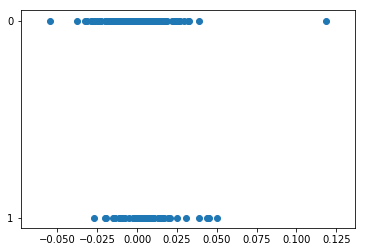

In [10]:
fig = plt.figure()

plt.scatter(df[:,1], target)
#plt.scatter(Y_test,pred)
#plt.plot(clf.predict(X_test), Y_test, label="Model")
#plt.plot(X_test, true_fun(X_test), label="True function")
#plt.scatter(df, target, edgecolor='b', s=20, label="Samples")

#plt.plot(X_test, model.predict(X_test), label="Model")
plt.show()
